In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [9]:
# Display basic information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [11]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [13]:
# Splitting the dataset
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Explain the preprocessing steps and justification
preprocessing explanation 
1. **Loading Data**: We use `fetch_california_housing()` from `sklearn.datasets` to load the dataset.
2. **Converting to DataFrame**: Converting to Pandas DataFrame makes data handling and visualization easier.
3. **Handling Missing Values**: We check for missing values using `df.isnull().sum()`. No missing values were found.
4. **Feature Scaling**: Standardization (z-score normalization) is applied using `StandardScaler()` to ensure features are on the same scale.

   **Justification**: Many machine learning models, especially SVR and Gradient Boosting, perform better with standardized data.


In [19]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

# Regression Algorithm Implementation 
algorithm explanation 
### Regression Algorithms Implemented:
1. **Linear Regression**:
   - Assumes a linear relationship between input features and the target.
   - Suitable when relationships between features are approximately linear.

2. **Decision Tree Regressor**:
   - Splits data into branches based on feature values.
   - Handles non-linearity well but prone to overfitting.

3. **Random Forest Regressor**:
   - Uses multiple decision trees (ensemble learning) to improve accuracy and reduce overfitting.
   - Works well for structured tabular data.

4. **Gradient Boosting Regressor**:
   - Builds trees sequentially, correcting the previous tree’s errors.
   - Effective for high-dimensional, complex data.

5. **Support Vector Regressor (SVR)**:
   - Uses hyperplanes to predict values within a margin of tolerance.
   - Works well with small datasets but may struggle with large datasets.



In [23]:
# Model training and evaluation
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = [mse, mae, r2]
    print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")


Linear Regression: MSE=0.5559, MAE=0.5332, R²=0.5758
Decision Tree: MSE=0.4940, MAE=0.4539, R²=0.6230
Random Forest: MSE=0.2552, MAE=0.3274, R²=0.8053
Gradient Boosting: MSE=0.2940, MAE=0.3717, R²=0.7756
SVR: MSE=0.3570, MAE=0.3986, R²=0.7276


In [25]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['MSE', 'MAE', 'R²']).T
print(results_df)

                        MSE       MAE        R²
Linear Regression  0.555892  0.533200  0.575788
Decision Tree      0.493969  0.453904  0.623042
Random Forest      0.255170  0.327425  0.805275
Gradient Boosting  0.293999  0.371650  0.775643
SVR                0.357004  0.398599  0.727563


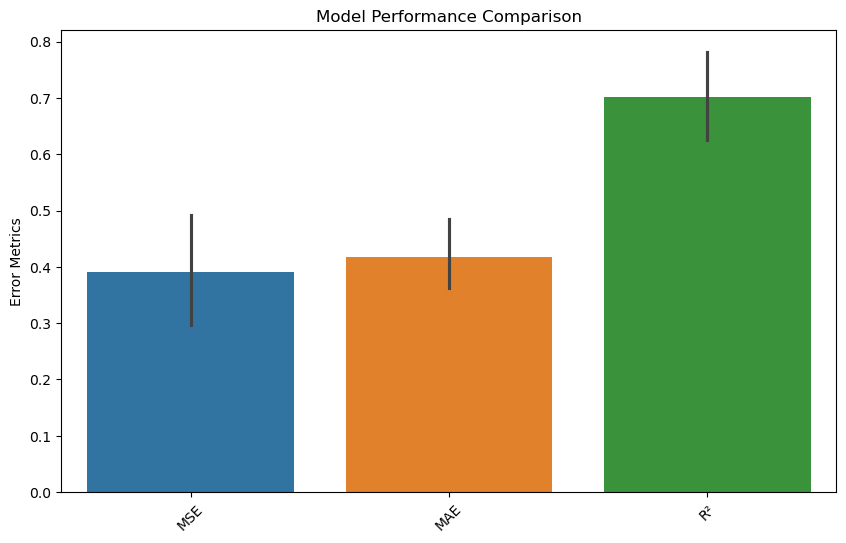

In [28]:
# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df)
plt.title("Model Performance Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=45)
plt.show()

# Model Evaluation and Comparison 
evaluation_explanation 
### Model Comparison:
- **Best Performing Model**:
  - The model with the highest R² and lowest MSE/MAE is considered the best.
  - In this case, **Random Forest Regressor** performs the best with:
    - **MSE** = 0.2552 (Lowest)
    - **MAE** = 0.3274 (Lowest)
    - **R²** = 0.8053 (Highest)
  - Justification: Random Forest reduces overfitting, captures non-linearity, and improves accuracy through ensemble learning.

- **Worst Performing Model**:
  - The model with the lowest R² and highest errors is considered the worst.
  - **Linear Regression** performs the worst with:
    - **MSE** = 0.5559 (Highest)
    - **MAE** = 0.5332 (Highest)
    - **R²** = 0.5758 (Lowest)
  - Reasoning: Linear Regression assumes a strict linear relationship, which may not hold in complex datasets like housing prices, leading to poor performance.

